# Graduate Project of CNN Regression version 3.0 - Simple NN

## Initialize machine learning library

In [235]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as opt
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
print(torch.__version__)

2.6.0+cpu


### Set computing device as CPU

In [236]:
device = torch.device("cpu")
print(f"Using Device: {device}")

Using Device: cpu


## Data load in and pre-processing

In [237]:
features = pd.read_csv("/home/seb/Project/BEng-Graduate/data/data.csv", header=None)
features = features.transpose()
# features = data.values.T.astype(np.float32)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,500,501,502,503,504,505,506,507,508,509
0,70.0,200.0,300.0,28.801196,81.105366,6125.0,5690.0,6560.0,870.0,-120.782809,...,-118.949780,-118.499691,-118.020283,-117.503018,-116.936596,-116.305609,-115.588315,-114.752730,-113.749309,-112.495888
1,70.0,200.0,400.0,2.517709,47.612011,3860.0,3840.0,3880.0,40.0,-121.070769,...,-116.630247,-116.579676,-116.529680,-116.480227,-116.431285,-116.382825,-116.334820,-116.287244,-116.240073,-116.193283
2,70.0,200.0,500.0,3.068820,63.245190,3945.0,3920.0,3970.0,50.0,-121.322709,...,-113.516857,-113.319928,-113.096880,-112.840765,-112.541882,-112.186250,-111.752916,-111.208943,-110.499310,-109.524470
3,70.0,200.0,600.0,5.874144,55.115136,4050.0,4000.0,4100.0,100.0,-121.477196,...,-108.600004,-104.475919,-92.225585,-111.170745,-123.172305,-140.835187,-127.837068,-124.087345,-122.231465,-121.097501
4,70.0,200.0,700.0,-123.202804,67.654798,3635.0,4160.0,3110.0,-1050.0,-121.156614,...,-116.668022,-116.650467,-116.633328,-116.616634,-116.600387,-116.584503,-116.569146,-116.554043,-116.539304,-116.524892


Check data shape

In [238]:
print("data dimension:", features.shape)

data dimension: (392, 510)


### Set label and transform it into a nparray

In [239]:
labels = np.array(features.iloc[:,9:])

# Delete label in feature array
features = np.array(features.iloc[:, :9])
features.shape

(392, 9)

### Data standardization using sklearn

In [240]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)
input_features[0]

array([-1.5       , -1.5       , -1.52752523,  0.47353794,  0.91441986,
        2.55646587,  2.22862805,  2.44093019,  1.07199055])

## Constract Neural Network

### Transform np.array to torch tensor

In [241]:
x = torch.tensor(input_features, dtype=float)
y = torch.tensor(labels, dtype=float)

### Randomly initialize weight and bias

In [242]:
weights1 = torch.randn((9,256), dtype=float, requires_grad=True)
bias1 = torch.randn(256, dtype=float, requires_grad=True)
weights2 = torch.randn((256, 501), dtype=float, requires_grad=True)
bias2 = torch.randn(501, dtype=float, requires_grad=True)

### Set learning rate and loss function

In [243]:
learning_rate = 0.001
losses = []

### Training

In [244]:
for i in range(1000):
    # Calculate the hidden layer
    hidden = x.mm(weights1) + bias1
    hidden = torch.relu(hidden)

    # Predict
    predictions = hidden.mm(weights2) + bias2

    # Calculate losses(MSE)
    loss = torch.mean((predictions - y)**2)
    losses.append(loss.data.numpy())

    # Print losses
    if i % 100 == 0:
        print("loss:", loss)

    # Grad backwards
    loss.backward()

    # Update weights and bias
    weights1.data.add_(-learning_rate * weights1.grad.data)
    bias1.data.add_(-learning_rate * bias1.grad.data)
    weights2.data.add_(-learning_rate * weights2.grad.data)
    bias2.data.add_(-learning_rate * bias2.grad.data)

    # Empty weights and bias to make sure their independence
    weights1.grad.data.zero_()
    bias1.grad.data.zero_()
    weights2.grad.data.zero_()
    bias2.grad.data.zero_()

loss: tensor(15123.5488, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(9093.8801, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(3266.8429, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(1171.4331, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(709.6989, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(526.0109, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(419.3225, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(347.7713, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(296.3295, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss: tensor(257.8778, dtype=torch.float64, grad_fn=<MeanBackward0>)


check predictions array shape

In [245]:
predictions.shape

torch.Size([392, 501])

### Output predictions

In [246]:
predict = predictions.data.numpy()
predict.shape

(392, 501)

### Compare predictions to actural values

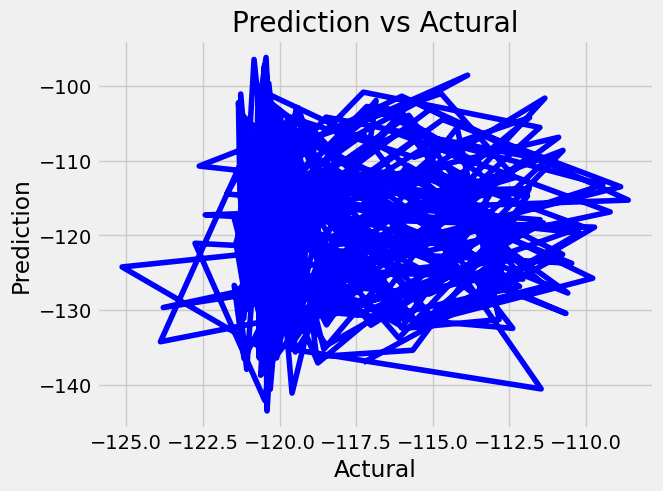

In [247]:
# Set group number array
# group_num = np.arange(1, 393)

# Compare actural values with prediction
plt.plot(labels[:, 0], predict[:, 0], 'b-')

# Set graph config
plt.xlabel('Actural'); plt.ylabel('Prediction'); plt.title('Prediction vs Actural')
plt.show()